<a href="https://colab.research.google.com/github/ktabata117/classmaterial_public/blob/master/aidai_2_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

第3回授業

*でわ、散布図を書いてみよう。*

In [1]:
import numpy as np
import pandas as pd

In [ ]:
soukan=pd.read_csv('/content/sample_data/soukan.csv')
soukan

,社員番号,給料,残業時間
0,1,30,22
1,2,26,15
2,3,40,26
3,4,28,12
4,5,26,9
5,6,35,20
6,7,20,15
7,8,60,30
8,9,15,13
9,10,20,8


In [ ]:
pay =np.array(soukan['給料'])
zangyou= np.array(soukan['残業時間'])

In [ ]:
pay

array([30, 26, 40, 28, 26, 35, 20, 60, 15, 20])

In [ ]:
zangyou

array([22, 15, 26, 12,  9, 20, 15, 30, 13,  8])

図を書くライブラリーはmatplotlib

In [2]:
import matplotlib.pyplot as plt


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32102 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26009 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27531 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 32102 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 26009 missing from current font.
  font.set_te

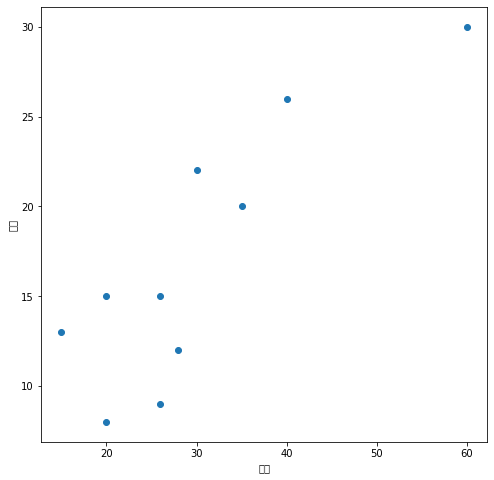

In [ ]:
fig =plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
ax.scatter(pay,zangyou)
ax.set_xlabel('給料')
ax.set_ylabel('残業')
plt.show()

文字化けしている。今の所、修正方法分からない。仕方ないので、英語表記

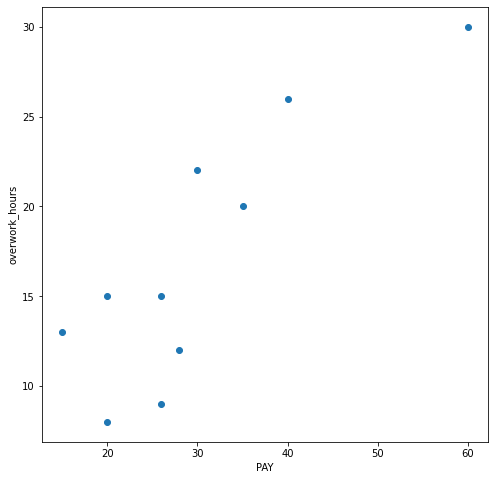

In [ ]:
fig =plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
ax.scatter(pay,zangyou)
ax.set_xlabel('PAY')
ax.set_ylabel('overwork_hours')
plt.show()

相関係数を求めてみる。相関係数について注意すること。原因と結果を示しているわけではない。


In [ ]:
np.corrcoef(pay, zangyou)

array([[1.        , 0.84836489],
       [0.84836489, 1.        ]])

In [3]:
k_i=pd.read_csv('/content/sample_data/kion_ice.csv')
k_i

,月,気温,アイスクリーム
0,1,10.6,464
1,2,12.2,397
2,3,14.9,493
3,4,20.3,617
4,5,25.2,890
5,6,26.3,883
6,7,29.7,1292
7,8,31.6,1387
8,9,27.7,843
9,10,22.6,621


In [17]:
x=np.array(k_i['気温'])
y=np.array(k_i['アイスクリーム'])

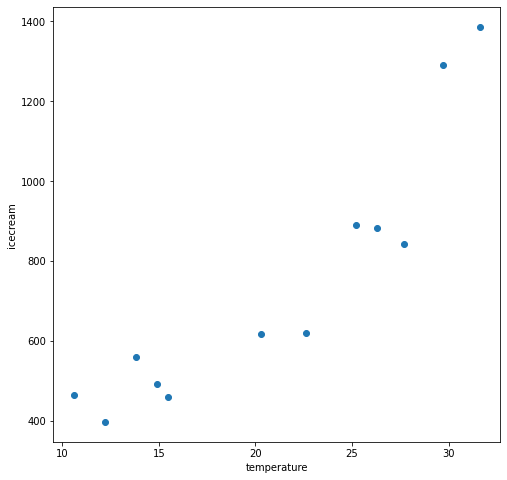

In [26]:
fig =plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
ax.scatter(x,y)
ax.set_xlabel('temperature')
ax.set_ylabel('icecream')
plt.show()

ここで議論を、飛躍というか、第一の最終段階に。最小二乗法を実施してみましょう。Ordinary Least Squares

In [21]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [24]:
model =sm.OLS(y,sm.add_constant(x))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     48.46
Date:                Mon, 03 May 2021   Prob (F-statistic):           3.89e-05
Time:                        12:49:36   Log-Likelihood:                -75.369
No. Observations:                  12   AIC:                             154.7
Df Residuals:                      10   BIC:                             155.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -107.0571    128.673     -0.832      0.4

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))
